First, import needed modules

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Initalize variables

In [166]:
path = os.getcwd()
print(path)

/Users/jan/Dropbox/UP_EPQM/2222/MA/powerlinemonsters


Import datasets

In [167]:
btw = pd.read_csv(f'{path}/data/btw_treat.csv', encoding = 'UTF-8-SIG', sep=',', converters={'AGS': str})

In [168]:
btw.treatment_50.unique()

array([2010., 2005.,    0., 2014.])

View summary statistics

In [169]:
columns = ['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere']
btw.describe().to_csv(f'{path}/tables/btw/btw_descriptives.csv', sep=';', encoding='utf-8-sig', decimal=',', columns=columns, float_format='%.2f')
btw[columns].describe()

,Union,SPD,FDP,Linke,Grüne,Andere
count,78110.000000,78110.000000,78110.000000,78110.000000,78110.000000,78110.000000
mean,43.988886,29.875659,6.749605,7.121998,5.653732,6.610120
std,12.010638,12.288360,3.997007,8.168828,3.191483,6.491112
min,1.098432,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.319335,20.143136,3.809024,0.836478,3.320797,2.298363
50%,42.916331,29.077540,5.985883,4.137995,5.107530,4.559065
75%,51.644096,38.519130,8.703088,9.949111,7.325108,8.523961
max,100.000000,85.294118,52.373418,55.294118,50.000000,62.857143


In [170]:
btw['year'].value_counts().to_csv(f'{path}/tables/btw/btw_obsyears.csv', sep=';', encoding='utf-8-sig', decimal=',', float_format='%.2f')

Calculate average vote shares in all years by treatment variable

In [171]:
avg_dfs = {2005: 'treatment_05', 2010: 'treatment_09', 2014: 'treatment_13'}
for year, treatment in avg_dfs.items():
    avg_dfs[year] = btw[['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere', treatment, 'year']].groupby([treatment, 'year'], as_index = False).mean()
    avg_dfs[year].rename(columns = {f'{treatment}':'treatment'}, inplace = True)
    mean = btw[['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere', 'year']].groupby(['year'], as_index = False).mean()
    mean['treatment'] = 'Mean'
    avg_dfs[year] = pd.concat([avg_dfs[year], mean])

Plot the average vote shares over years for treated and untreated municipalities

In [172]:
treatments = ['None', 'Direct Line', 'Within 15km', 'Within 30km', 'Within 50km', 'Mean']
blacks = ['#000000', '#191919', '#323232', '#4c4c4c', '#666666', 'blue']
reds = ['#cc0000', '#d11919', '#d63232', '#db4c4c', '#e06666', 'blue']
yellows = ['#ffd075', '#ffc75c', '#ffbe42', '#ffb529', '#ffac0f', 'blue']
purples = ['#800080', '#8c198c', '#993299', '#a64ca6', '#b266b2', 'blue']
greens = ['#008000', '#198c19', '#329932', '#4ca64c' , '#66b266', 'blue']
greys = ['#808080', '#8c8c8c', '#999999', '#a6a6a6', '#b2b2b2', 'blue']
markers = ['o', 's', 'v', 'D', '^', 'h']

for year, df in avg_dfs.items():
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10), dpi=300)
    #set x labels
    plt.setp(axes, xticks=[1994,1998,2002,2005,2009,2013,2017])
    # set legend font size
    plt.rc('legend',fontsize=6)
    # title for entire figure
    fig.suptitle(f'Average Vote Shares \n by treatment status in {year}', fontsize=20)

    for i, treatment in enumerate(treatments):
        plot_data = df[df['treatment'] == treatment]
        # set ls
        if treatment == 'Mean':
            ls = '--'
        else:
            ls = '-'
        # edit subplots
        axes[0, 0].set_title('Union', fontsize=12)
        axes[0, 0].set_ylabel('% Votes', fontsize=10)
        axes[0, 0].plot(plot_data['year'], plot_data['Union'], c=blacks[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
        axes[0, 0].legend(loc='lower left')
        axes[0, 0].axvline(x=year, c='red', ls='--')

        axes[0, 1].set_title('SPD', fontsize=12)
        axes[0, 1].set_ylabel('% Votes', fontsize=10)
        axes[0, 1].plot(plot_data['year'], plot_data['SPD'], c=reds[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
        axes[0, 1].legend(loc='lower left')
        axes[0, 1].axvline(x=year, c='red', ls='--')

        axes[1, 0].set_title('FDP', fontsize=12)
        axes[1, 0].set_ylabel('% Votes', fontsize=10)
        axes[1, 0].plot(plot_data['year'], plot_data['FDP'], c=yellows[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
        axes[1, 0].legend(loc='upper left')
        axes[1, 0].axvline(x=year, c='red', ls='--')

        axes[1, 1].set_title('Linke', fontsize=12)
        axes[1, 1].set_ylabel('% Votes', fontsize=10)
        axes[1, 1].plot(plot_data['year'], plot_data['Linke'], c=purples[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
        axes[1, 1].legend(loc='upper left')
        axes[1, 1].axvline(x=year, c='red', ls='--')

        axes[2, 0].set_title('Grüne', fontsize=12)
        axes[2, 0].set_ylabel('% Votes', fontsize=10)
        axes[2, 0].plot(plot_data['year'], plot_data['Grüne'], c=greens[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
        axes[2, 0].legend(loc='upper left')
        axes[2, 0].axvline(x=year, c='red', ls='--')

        axes[2, 1].set_title('Andere', fontsize=12)
        axes[2, 1].set_ylabel('% Votes', fontsize=10)
        axes[2, 1].plot(plot_data['year'], plot_data['Andere'], c=greys[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
        axes[2, 1].legend(loc='upper left')
        axes[2, 1].axvline(x=year, c='red', ls='--')

    # Save figure
    fig.savefig(f'{path}/figures/btw/btw_{year}_vote_shares.png')
    plt.close()

Plot graph for ever-treated status

In [173]:
avg_ever_treated = btw[['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere', 'ever_treated', 'year']].groupby(['ever_treated', 'year'], as_index = False).mean()
avg_ever_treated.rename(columns = {'ever_treated':'treatment'}, inplace = True)
mean = btw[['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere', 'year']].groupby(['year'], as_index = False).mean()
mean['treatment'] = 'Mean'
avg_ever_treated = pd.concat([avg_ever_treated, mean])
avg_ever_treated.head()

,treatment,year,Union,SPD,FDP,Linke,Grüne,Andere
0,Direct Line,1994.0,47.140173,36.924623,5.004801,3.216032,5.244199,2.470171
1,Direct Line,1998.0,40.196122,42.735893,4.416774,4.462326,4.187903,4.000981
2,Direct Line,2002.0,42.267404,40.498548,6.476613,3.958168,4.957295,1.841973
3,Direct Line,2005.0,40.888530,35.863536,7.064821,7.896701,4.729135,3.557276
4,Direct Line,2009.0,39.691574,25.455814,11.812289,11.270234,7.521413,4.248676


In [174]:
treatments = ['None', 'Direct Line', 'Within 15km', 'Within 30km', 'Within 50km', 'Mean']
blacks = ['#000000', '#191919', '#323232', '#4c4c4c', '#666666', 'blue']
reds = ['#cc0000', '#d11919', '#d63232', '#db4c4c', '#e06666', 'blue']
yellows = ['#ffd075', '#ffc75c', '#ffbe42', '#ffb529', '#ffac0f', 'blue']
purples = ['#800080', '#8c198c', '#993299', '#a64ca6', '#b266b2', 'blue']
greens = ['#008000', '#198c19', '#329932', '#4ca64c' , '#66b266', 'blue']
greys = ['#808080', '#8c8c8c', '#999999', '#a6a6a6', '#b2b2b2', 'blue']
markers = ['o', 's', 'v', 'D', '^', 'h']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10), dpi=300)
#set x labels
plt.setp(axes, xticks=[1994,1998,2002,2005,2009,2013,2017])
# set legend font size
plt.rc('legend',fontsize=6)
# title for entire figure
fig.suptitle(f'Average Vote Shares \n by ever-treated status', fontsize=20)

for i, treatment in enumerate(treatments):
    plot_data = avg_ever_treated[avg_ever_treated['treatment'] == treatment]
    if treatment == 'Mean':
        ls = '--'
    else:
        ls = '-'
    # edit subplots
    axes[0, 0].set_title('Union', fontsize=12)
    axes[0, 0].set_ylabel('% Votes', fontsize=10)
    axes[0, 0].plot(plot_data['year'], plot_data['Union'], c=blacks[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
    axes[0, 0].legend(loc='lower left')

    axes[0, 1].set_title('SPD', fontsize=12)
    axes[0, 1].set_ylabel('% Votes', fontsize=10)
    axes[0, 1].plot(plot_data['year'], plot_data['SPD'], c=reds[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
    axes[0, 1].legend(loc='lower left')

    axes[1, 0].set_title('FDP', fontsize=12)
    axes[1, 0].set_ylabel('% Votes', fontsize=10)
    axes[1, 0].plot(plot_data['year'], plot_data['FDP'], c=yellows[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
    axes[1, 0].legend(loc='upper left')

    axes[1, 1].set_title('Linke', fontsize=12)
    axes[1, 1].set_ylabel('% Votes', fontsize=10)
    axes[1, 1].plot(plot_data['year'], plot_data['Linke'], c=purples[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
    axes[1, 1].legend(loc='upper left')

    axes[2, 0].set_title('Grüne', fontsize=12)
    axes[2, 0].set_ylabel('% Votes', fontsize=10)
    axes[2, 0].plot(plot_data['year'], plot_data['Grüne'], c=greens[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
    axes[2, 0].legend(loc='upper left')

    axes[2, 1].set_title('Andere', fontsize=12)
    axes[2, 1].set_ylabel('% Votes', fontsize=10)
    axes[2, 1].plot(plot_data['year'], plot_data['Andere'], c=greys[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
    axes[2, 1].legend(loc='upper left')

# Save figure
fig.savefig(f'{path}/figures/btw/btw_ever_treated_vote_shares.png')
plt.close()

Plot general development of first and second vote shares

In [175]:
btw_eszs = pd.read_csv(f'{path}/data/btw_eszs.csv', encoding = 'utf-8-sig')
btw_eszs['vote_type'] = np.where(btw_eszs['first_vote'] == 1, 'First Vote', 'Second Vote')

In [176]:
avg_eszs_vote_shares = btw_eszs[['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere', 'year', 'vote_type']].groupby(['year', 'vote_type'], as_index = False).mean()
avg_both_vote_shares = btw_eszs[['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere', 'year']].groupby(['year'], as_index = False).mean()
avg_both_vote_shares['vote_type'] = 'Mean'
avg_vote_shares = pd.concat([avg_eszs_vote_shares, avg_both_vote_shares], sort=True)
avg_vote_shares.head()

,Andere,FDP,Grüne,Linke,SPD,Union,vote_type,year
0,2.612058,3.376459,4.965478,3.657808,34.555566,50.832633,First Vote,1994
1,3.518688,6.234391,5.464208,3.979173,33.479900,47.323640,Second Vote,1994
2,3.635418,3.156431,3.807150,4.884896,40.366090,44.150015,First Vote,1998
3,6.183717,5.827799,4.954207,5.153792,38.169901,39.710585,Second Vote,1998
4,1.065732,5.902271,4.181176,4.434954,38.008248,46.407619,First Vote,2002


In [177]:
treatments = ['None', 'Direct Line', 'Within 15km', 'Within 30km', 'Within 50km', 'Mean']
blacks = ['#000000', '#191919', 'blue']
reds = ['#cc0000', '#d11919', 'blue']
yellows = ['#ffd075', '#ffc75c', 'blue']
purples = ['#800080', '#8c198c', 'blue']
greens = ['#008000', '#198c19', 'blue']
greys = ['#808080', '#8c8c8c', 'blue']
markers = ['o', 's', 'h']

vote_types = ['First Vote', 'Second Vote', 'Mean']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10), dpi=300)
#set x labels
plt.setp(axes, xticks=[1994,1998,2002,2005,2009,2013,2017])
# set legend font size
plt.rc('legend',fontsize=6)
# title for entire figure
fig.suptitle(f'Average First and Second Vote Shares', fontsize=20)

for i, type in enumerate(vote_types):
    if type == 'Mean':
        ls = '--'
    else:
        ls = '-'
    plot_data = avg_vote_shares[avg_vote_shares['vote_type'] == type]
    # edit subplots
    axes[0, 0].set_title('Union', fontsize=12)
    axes[0, 0].set_ylabel('% Votes', fontsize=10)
    axes[0, 0].plot(plot_data['year'], plot_data['Union'], c=blacks[i], marker = markers[i], label=type, lw=0.8, ms=4, ls=ls)
    axes[0, 0].legend(loc='lower left')

    axes[0, 1].set_title('SPD', fontsize=12)
    axes[0, 1].set_ylabel('% Votes', fontsize=10)
    axes[0, 1].plot(plot_data['year'], plot_data['SPD'], c=reds[i], marker = markers[i], label=type, lw=0.8, ms=4, ls=ls)
    axes[0, 1].legend(loc='lower left')

    axes[1, 0].set_title('FDP', fontsize=12)
    axes[1, 0].set_ylabel('% Votes', fontsize=10)
    axes[1, 0].plot(plot_data['year'], plot_data['FDP'], c=yellows[i], marker = markers[i], label=type, lw=0.8, ms=4, ls=ls)
    axes[1, 0].legend(loc='upper left')

    axes[1, 1].set_title('Linke', fontsize=12)
    axes[1, 1].set_ylabel('% Votes', fontsize=10)
    axes[1, 1].plot(plot_data['year'], plot_data['Linke'], c=purples[i], marker = markers[i], label=type, lw=0.8, ms=4, ls=ls)
    axes[1, 1].legend(loc='upper left')

    axes[2, 0].set_title('Grüne', fontsize=12)
    axes[2, 0].set_ylabel('% Votes', fontsize=10)
    axes[2, 0].plot(plot_data['year'], plot_data['Grüne'], c=greens[i], marker = markers[i], label=type, lw=0.8, ms=4, ls=ls)
    axes[2, 0].legend(loc='upper left')

    axes[2, 1].set_title('Andere', fontsize=12)
    axes[2, 1].set_ylabel('% Votes', fontsize=10)
    axes[2, 1].plot(plot_data['year'], plot_data['Andere'], c=greys[i], marker = markers[i], label=type, lw=0.8, ms=4, ls=ls)
    axes[2, 1].legend(loc='upper left')

# Save figure
fig.savefig(f'{path}/figures/btw/btw_avg_vote_shares.png')
plt.close()

Plot a map with the partys who received the largest first vote share in each year (after 2002) for each municipality

In [178]:
# Load shapefiles
import geopandas as gpd
municipalities = gpd.read_file(f'{path}/data/geodata/municipalities.shp')
uninc = gpd.read_file(f'{path}/data/geodata/unincorporated.shp')
states = gpd.read_file(f'{path}/data/geodata/VG250_LAN.shp')
powerlines = gpd.read_file(f'{path}/data/geodata/all_powerlines.shp')
powerlines = powerlines.set_geometry('geometry')
powerlines['year'] = powerlines['year'].astype(int)
# set year to treatment year
powerlines['year'] = np.where(powerlines['year'] == 2013, 2014, powerlines['year'])
powerlines['year'] = np.where(powerlines['year'] == 2009, 2010, powerlines['year'])

In [179]:
# Prepare df with election winners
btw_win = btw[['AGS', 'year', 'Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere']]
btw_win['winner'] = btw_win[['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere']].idxmax(axis = 1)
btw_win = btw_win[['AGS', 'year', 'winner']]
btw_win = btw_win[btw_win['year'] > 2002]
btw_win['winner'].describe()

/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_84355/3806710613.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btw_win['winner'] = btw_win[['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere']].idxmax(axis = 1)


count     44631
unique        6
top       Union
freq      35719
Name: winner, dtype: object

In [180]:
# Merge win and municipalities
btw_win_plot = pd.merge(btw_win, municipalities, on='AGS')
btw_win_plot = btw_win_plot.set_geometry('geometry')

In [181]:
# add c column to df
years = btw_win_plot.year.unique().astype(int).tolist()
cs = {'Union': '#000000', 'SPD': '#cc0000', 'FDP': '#ffff00', 'Grüne': '#008000', 'Linke': '#800080', 'Andere': '#808080'}
btw_win_plot['c'] = 0
for party, c in cs.items():
    btw_win_plot['c'] = np.where(btw_win['winner'] == party, c, btw_win_plot['c'])

In [186]:
legend_dict = {2005: 'DENA 2005', 2010: 'EnLAG 2009', 2014: 'BBPlG 2013'}
for year in years:
    # subset data
    plot_data = btw_win_plot[btw_win_plot['year'] == year]
    # subset powerlines
    plot_pl = powerlines[powerlines['year'] <= year]
    plot_pl = plot_pl.sort_values('year')
    plot_pl['year'] = plot_pl['year'].astype(str)
    # setup figure
    fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
    ax.set_aspect('equal')
    ax.set_axis_off()
    municipalities.plot(ax=ax, color='lightblue', edgecolor='blue', lw=0.01, zorder=1)
    #uninc.plot(ax=ax, c='lightgray', edgec='cyan', hatch='+++++', lw=0.001, zorder=2)
    plot_data.plot(ax=ax, color=plot_data['c'], lw=0.01, zorder=3)
    states.boundary.plot(ax=ax, color='darkblue', lw = 0.1, zorder=4)
    plot_pl.plot(ax=ax, column='year', cmap='winter', legend=True, lw=2, zorder=5)
    plt.title(f'Federal Election {year} \n Partys who receiced the largest first vote share', fontsize=20)
    #ax.annotate('Source: Rajasthan Datastore, 2019',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, c='black')
    # change legend order
    def replace_legend_items(legend, mapping):
        for txt in legend.texts:
            for k,v in mapping.items():
                if txt.get_text() == str(k):
                    txt.set_text(v)

    replace_legend_items(ax.get_legend(), legend_dict)
    plt.savefig(f'{path}/figures/btw/btw_winners_{year}.png')
    plt.close()
    print(year)

2005
2009
2013
2017


Plot municipalities with data for office and postal ballot

In [ ]:
#Prepare dfs
btw_postal = btw[btw['Vote type'] == 'postal']
btw_postal = btw_postal[['AGS', 'year']]

btw_office = btw[btw['Vote type'] == 'office']
btw_office = btw_office[['AGS', 'year']]

KeyError: 'Vote type'

In [ ]:
btw_postal.value_counts('year')
btw_office.value_counts('year')

year
2013.0    22306
2017.0    21962
2009.0    20593
2005.0    19299
2002.0    19204
dtype: int64

In [ ]:
#office ballot
for year in years:
    btw_office_year = btw_office[btw_office['year'] == year]
    btw_office_plot = pd.merge(btw_office_year, municipalities, on='AGS')
    btw_office_plot = btw_office_plot.set_geometry('geometry')
    
    fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
    ax.set_aspect('equal')
    ax.set_axis_off()
    municipalities.plot(ax=ax, c='lightblue', edgec='blue', lw=0.01, zorder=1)
    states.boundary.plot(ax=ax, c='darkblue', lw = 0.1, zorder=2)
    btw_office_plot.plot(ax=ax, c='#E9791A', edgec='darkorange', lw=0.01, zorder=3)
    #btw_other_plot.plot(ax=ax, c='green', edgec='darkorange', lw=0.01, zorder=4)
    powerlines.plot(ax=ax, c='red', lw=2, zorder=5)
    plt.title(f'Municipalities with office ballot data in {year}', fontsize=20)
    ax.annotate('Source: Rajasthan Datastore, 2019',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, c='black')
    plt.savefig(f'{path}/figures/btw/office_votes_{year}.png')
    plt.close()

In [ ]:
#postal ballot
for year in years:
    btw_postal_year = btw_postal[btw_postal['year'] == year]
    btw_postal_plot = pd.merge(btw_postal_year, municipalities, on='AGS')
    btw_postal_plot = btw_postal_plot.set_geometry('geometry')
    
    fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
    ax.set_aspect('equal')
    ax.set_axis_off()
    municipalities.plot(ax=ax, c='lightblue', edgec='blue', lw=0.01, zorder=1)
    states.boundary.plot(ax=ax, c='darkblue', lw = 0.1, zorder=2)
    btw_postal_plot.plot(ax=ax, c='#E9791A', edgec='darkorange', lw=0.01, zorder=3)
    #btw_other_plot.plot(ax=ax, c='green', edgec='darkorange', lw=0.01, zorder=4)
    powerlines.plot(ax=ax, c='red', lw=2, zorder=5)
    plt.title(f'Municipalities with postal ballot data in {year}', fontsize=20)
    ax.annotate('Source: Rajasthan Datastore, 2019',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, c='black')
    plt.savefig(f'{path}/figures/btw/postal_votes_{year}.png')
    plt.close()

Plot the development of vote types

In [ ]:
vote_types = btw.groupby(['year', 'Vote type'], as_index=False).sum()

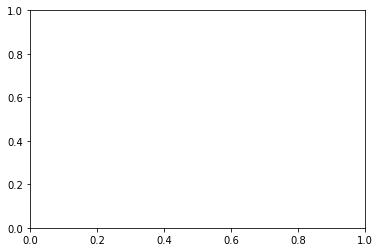

In [ ]:
import seaborn as sns
fig, ax = plt.subplots()
g = sns.catplot(x='year', y='Gültig', hue='Vote type', kind='point', data=vote_types, hue_order=['office', 'postal', 'other'])
g.set(ylabel='Valid first votes (in M.)')
plt.savefig(f'{path}/figures/btw/vote_types.png')
plt.close()

Inspect whether the share of municipalities with postal/other ballot data available varies significantly for treated and untreated municipalities

In [ ]:
vote_types = btw[['AGS', 'year', 'Vote type', 'treatment']]
vote_types['postal'] = np.where(vote_types['Vote type'] == 'postal', 1, 0)
vote_types['office'] = np.where(vote_types['Vote type'] == 'office', 1, 0)
vote_types['other'] = np.where(vote_types['Vote type'] == 'other', 1, 0)
vote_types = vote_types[vote_types['year'] >= 2013]
vote_types.head()

/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_25639/2820199629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vote_types['postal'] = np.where(vote_types['Vote type'] == 'postal', 1, 0)
/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_25639/2820199629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vote_types['office'] = np.where(vote_types['Vote type'] == 'office', 1, 0)
/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_25639/2820199629.py:4: SettingWithCopyWarning: 

,AGS,year,Vote type,treatment,postal,office,other
12,01001000,2013.0,office,100,0,1,0
13,01001000,2013.0,postal,100,1,0,0
14,01001000,2013.0,office,100,0,1,0
15,01001000,2013.0,postal,100,1,0,0
16,01001000,2017.0,office,100,0,1,0


In [ ]:
vote_types = vote_types.groupby(['treatment', 'year'], as_index=False).sum()
vote_types['postal/office'] = vote_types['postal']/vote_types['office']
vote_types['other/office'] = vote_types['other']/vote_types['office']
vote_types = vote_types.sort_values('treatment')
vote_types.head(20)

,treatment,year,postal,office,other,postal/office,other/office
0,0,2013.0,464,932,2,0.497854,0.002146
1,0,2017.0,476,908,2,0.524229,0.002203
2,10,2013.0,543,1492,0,0.363941,0.000000
3,10,2017.0,554,1464,0,0.378415,0.000000
4,100,2013.0,2074,5466,4,0.379437,0.000732
5,100,2017.0,2104,5358,2,0.392684,0.000373
6,20,2013.0,493,1350,2,0.365185,0.001481
7,20,2017.0,510,1330,0,0.383459,0.000000
8,30,2013.0,551,1238,0,0.445073,0.000000
9,30,2017.0,564,1224,0,0.460784,0.000000
